#**Demo: Principal Component Analysis in Python**


##**Basic Workflow:**
>* Understanding the Problem
>* Creating a Dataset of random numbers
>* Analyzing the data
>* Visualizing the data
>* Implementing PCA Technique on the data
>* Visualizing the Principal Components
>*Inference



##**Section-A : Understanding PCA**



##**Understanding the Problem**

###**Problem Definition**


Perform Principal Component Analysis(PCA) on a randomly generated dataset with two features. Plot the Principal Components of the dataset.

###**Dataset Description**

Here, we are going to use a Dataset with random numbers. This dataset contains 200 random numbers. It has 2 dimensions i.e. 2 features or variables

###**Tasks to be performed**

>* Import required libraries
>* Create a dataset of random numbers.
>* Analyze and prepare the dataset.
>* Visualizing the dataset. 
>* Implement PCA on the dataset
>* Visualize the Principal Components


#**Let us first understand what PCA is and how it works.**

Principal Component Analysis(PCA) is a dimensionality reduction technique in which we extract a new set of variables from the dataset. It is one of the widely used unsupervised algorithms. 	This technique can also be used for visualization, noise filtering, feature extraction or engineering and much more.

**When to use PCA ?**

PCA should be used when: 

* You have a very large number of dimensions.

* The variables are strongly correlated. 


**Variance(PC1) > Variance(PC2) > .........**

## ** PCA as Dimensionality Reduction**

###**Problem Definition**

A Computer Science Student is working on an Image Processing project. He wants to analyze a dataset of images of hand-written digits which has large number of features. Analyzing and training such large data is costing him a lot of computational power and time. You are given a task to use PCA technique to reduce the size of his data.  



###**Tasks to be performed**
 


>* Importing the dataset from sklearn.datasets library.
>* Analyze and prepare the dataset. 
>* Implement PCA on the dataset
>* Visualize the dataset.
>* Visualize the Principal Components.



###**Dataset Description**
The dataset consists of images of hand-written digits. It has 10 classes where each class corresponds to a digit.
Each datapoint in this dataset represents an 8x8 image of a digit. The dataset contains 64 dimensions or features.

Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.


###**Importing The Digits dataset from the sklearn.datasets library**

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sklearn.datasets import load_digits
digit = load_digits()

In [50]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

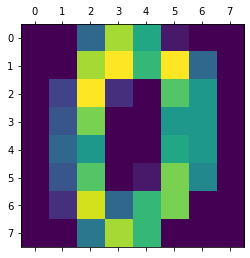

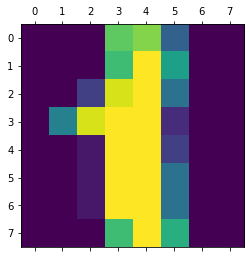

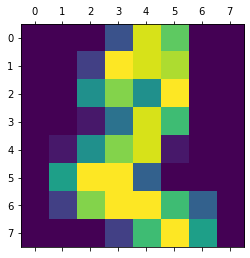

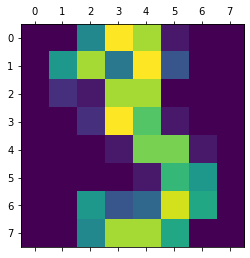

In [5]:
%matplotlib inline
for i in range(4):
  plt.matshow(digit.images[i])

**From above, you can see the images of digits that are stored in digit.images**

In [6]:
print(digit.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


###**Analyze and Prepare the dataset**

In [7]:
print('Shape of the dataset:',digit.data.shape)

Shape of the dataset: (1797, 64)


In [8]:
print(digit.data.dtype)

float64


###**Scaling the dataset**

We need to perform Scaling before applying PCA since PCA cretes the Principal Component 1 in the direction of the maximum variance. But, if we do not scale, some features in our dataset might show high variance because of their larger values.

This is why it is strongly advisable to scale the data before applying PCA technique.

StandardScaler() will normalize each column of the dataset INDIVIDUALLY, so that each column or feature or variable will have mean = 0 and standard deviation = 1.

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
digit_new = sc.fit_transform(digit.data) 

In [11]:
print(digit_new.data.shape)

(1797, 64)


###**Implementing PCA**

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()#If we do not specify any value to n_components, it will project as many principal components as there are features in the dataset.
digit_pca = pca.fit_transform(digit_new)#Here, we are fitting the model with the scaled data(digit_new) and applying dimensionality reduction on the scaled data.

In [18]:
print(np.round(pca.explained_variance_ratio_,3))

[0.12  0.096 0.084 0.065 0.049 0.042 0.039 0.034 0.03  0.029 0.028 0.026
 0.023 0.022 0.022 0.019 0.018 0.016 0.016 0.015 0.013 0.013 0.012 0.011
 0.01  0.009 0.009 0.008 0.008 0.007 0.007 0.007 0.007 0.006 0.006 0.006
 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003
 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001
 0.001 0.    0.    0.   ]


From above,you can see that most of the variance is being explained by the first principal component.  

**Variance(PC1) > Variance(PC2) > Variance(PC3) >............Variance(63) > Variance(PC64)**

In [20]:
import pandas as pd

In [21]:
dp = pd.DataFrame(digit_pca)
a=[]

for i in range(1,65):
  a.append('Feature{}'.format(i))
  

dp.columns = [a]
dp.head()

Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0  1.914214 -0.954502 -3.946035  2.028723 -0.267173  0.530327 -1.415321   
1  0.588980  0.924636  3.924755 -1.779850 -0.993430 -0.675652  1.878565   
2  1.302039 -0.317189  3.023333 -2.043376 -2.081155  0.935121 -1.296200   
3 -3.020770 -0.868772 -0.801744 -2.187039 -0.556813  0.727124  0.959766   
4  4.528949 -1.093480  0.973121 -1.419510 -1.715106  1.431592  1.073649   

   Feature8  Feature9 Feature10  ... Feature55 Feature56 Feature57 Feature58  \
0  1.496062  0.124914 -0.822246  ...  0.217284 -0.184659 -0.152393  0.486203   
1  0.556336  1.079877  0.087451  ...  0.005322  0.267950 -0.511874 -0.422479   
2  1.156160  0.785606 -1.099206  ...  0.178624  0.067011  0.112209  0.034327   
3 -1.382638  0.259075  0.744555  ... -0.115443  0.264125  0.018912 -0.153687   
4 -0.968240 -1.660216  1.174593  ... -0.335099 -0.098695  0.292078  0.157340   

  Feature59 Feature60 Feature61     Feature62     Feature63     Feature64  
0  0.009390 -0.009188 -0.027512 -0.000000e+00  0.000000e+00  8.243855e-15  
1 -0.090586  0.127878 -0.103101 -2.505501e-16  3.558642e-16  3.086705e-17  
2  0.444446 -0.518823  0.179429 -6.867224e-17  1.898808e-16  2.155553e-17  
3  0.275277 -0.115922  0.101748 -1.551012e-16 -1.370369e-16  1.432069e-17  
4 -0.122873 -0.084901 -0.072045 -2.251115e-16  1.997982e-16  9.037551e-18  

[5 rows x 64 columns]

In [22]:
digit_pca.shape

(1797, 64)

###**Scree Plot**

A Scree Plot is a Line Plot of Principal Components vs the Explained Variance Ratio i.e. the variance explained by each principal component.

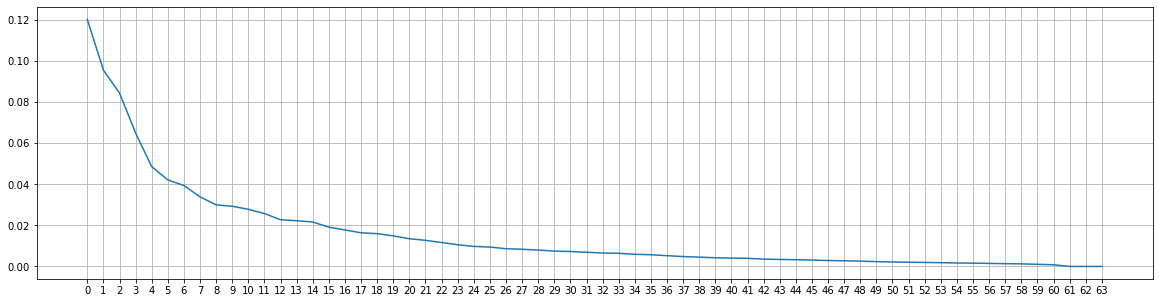

In [23]:
plt.figure(figsize=(20,5))
plt.plot(range(digit_pca.shape[1]) ,pca.explained_variance_ratio_)
plt.xticks(range(digit_pca.shape[1]))
plt.grid(True)
plt.show()

In [24]:
plt.figure(figsize=(20,5))
plt.plot(range(digit_pca.shape[1]) ,np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(digit_pca.shape[1]))
plt.title("Explained Vairance")
plt.grid(True)
plt.show()

From above, we can observe that the explained variance ratio after 14 is negligible.

###**Again, implementing PCA to project the data on 14 principal components.**

In [25]:
print(digit.data.shape)

(1797, 64)


From above, you can see that the dataset has 64 dimensions with 1797 rows.

In this example, we are using PCA to bring down the number of dimensions from 64 to 14(n_components).

PCA has a number of parameters such as- 

*   **n_components-** Defines the number of components you want to project your data onto.
*  **random state-** Fixed value which will guarantee the same sequence of random numbers are generated each time you run the code. And unless there is some other randomness present in the process, the results produced will be same as always. This helps in verifying the output.

For more information on PCA parameters [click here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) 



In [26]:
pca1 = PCA(n_components=14)#Projecting the data on 14 principal components.
digit_pca1 = pca1.fit_transform(digit_new) 

After applying PCA, we can see that the dimensionality has been reduced from 64 to just 14.

In [27]:
print('Shape of the dataset before applying PCA:',digit.data.shape)
print('Shape of the dataset after applying PCA:',digit_pca1.shape)

Shape of the dataset before applying PCA: (1797, 64)
Shape of the dataset after applying PCA: (1797, 14)


In [28]:
print(np.round(pca1.explained_variance_ratio_,3))

[0.12  0.096 0.084 0.065 0.049 0.042 0.039 0.034 0.03  0.029 0.028 0.026
 0.023 0.022]


In [29]:
np.sum(pca1.explained_variance_ratio_)

0.6872636606347189

In [35]:
pca1.components_[0,:]

array([-2.70566191e-17, -1.82235580e-01, -2.85867052e-01, -2.20369734e-01,
        2.51698245e-02,  9.49838480e-03,  5.24780531e-02,  6.26930308e-02,
       -3.47063531e-02, -2.45533808e-01, -2.29151609e-01,  1.07942772e-01,
       -3.62009257e-02, -3.87125258e-02,  8.37823247e-02,  9.27738549e-02,
       -1.66983029e-02, -1.36716837e-01,  6.30500300e-02,  1.22879018e-01,
       -1.48192745e-01,  2.34818747e-02,  1.71200463e-01,  1.04208919e-01,
        3.94689499e-03,  1.16389596e-01,  1.88204850e-01, -6.58598041e-02,
       -1.43532910e-01,  1.28205233e-01,  1.80621863e-01,  5.27101835e-02,
       -0.00000000e+00,  2.38903141e-01,  2.35006181e-01,  5.09086026e-03,
        1.31084760e-02,  1.59116346e-01,  1.29395164e-01, -0.00000000e+00,
        5.55972607e-02,  1.87157779e-01,  1.53532924e-01,  4.68260700e-02,
        1.10892324e-01,  1.07209870e-01, -1.79260985e-02,  2.27202875e-03,
        2.88177891e-02, -4.08683618e-02, -1.10270201e-01, -3.18226634e-02,
        7.90498239e-02, -

In [30]:
pca1.components_.shape

(14, 64)

From above,you can see that most of the variance is being explained by the first principal component.  

**Variance(PC1) > Variance(PC2) > Variance(PC3) >.........**

In [39]:
dp1 = pd.DataFrame(digit_pca1)
list2=[]

for i in range(1,15):
  list2.append('Feature{}'.format(i))
  

dp1.columns = [list2]
dp1.head()


Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0  1.914243 -0.954432 -3.945853  2.028885 -0.267111  0.525016 -1.420216   
1  0.589008  0.924633  3.924990 -1.780204 -0.995771 -0.675236  1.880409   
2  1.302000 -0.317220  3.023368 -2.043359 -2.080068  0.935418 -1.296154   
3 -3.020699 -0.868692 -0.801609 -2.186738 -0.558445  0.720687  0.956360   
4  4.528978 -1.093504  0.972962 -1.419578 -1.715438  1.431374  1.076834   

   Feature8  Feature9 Feature10 Feature11 Feature12 Feature13 Feature14  
0  1.496456  0.129119 -0.823302 -0.501176 -0.824501  0.242423 -0.218264  
1  0.559077  1.078370  0.091653 -0.503800  0.629569 -0.069315 -0.423161  
2  1.153377  0.781420 -1.103961  2.198544 -2.301418 -0.561026 -0.989941  
3 -1.381085  0.269544  0.748629 -1.072345  0.426803 -0.120535  0.990281  
4 -0.970987 -1.660125  1.176584 -1.014848 -1.382159 -0.333794 -0.131413

In [40]:
dp1.shape

(1797, 14)

In [41]:
plt.figure(figsize=(10,5))
plt.plot(range(digit_pca1.shape[1]) ,pca1.explained_variance_ratio_)
plt.xticks(range(digit_pca1.shape[1]))
plt.xlabel("PC")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

In [43]:
plt.figure(figsize=(10,5))
plt.plot(range(digit_pca1.shape[1]) ,np.cumsum(pca1.explained_variance_ratio_))
plt.xticks(range(digit_pca1.shape[1]))
plt.xlabel("PC")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

###**Visualizing the transfromed Data.**

In [44]:
digit_pca1.shape

(1797, 14)

Text(0, 0.5, 'Feature2')

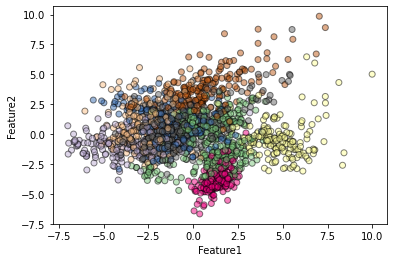

In [45]:
#Visualize with 2 components
plt.scatter(digit_pca1[:, 0], digit_pca1[:, 1],c=digit.target, edgecolor='black', alpha=0.5,cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('Feature1')
plt.ylabel('Feature2')

Let's try to understand what these components mean. Our original dataset is a 64-dimensional point cloud, and these points are the projection of each data point along the direction with the maximum variance. 

**Explained Variance-**The amount of variance explained by each of the principal components.

In [46]:
print(np.round(pca1.explained_variance_,3))

[7.345 5.835 5.154 3.966 2.966 2.572 2.406 2.069 1.83  1.789 1.698 1.571
 1.387 1.358]


**n_components_ -** It is the number of components on which we are projecting our data onto. It is equal to the parameter **n_components**. 

In [47]:
print(pca1.n_components_)

14


**Singular_values_ -**It corresponds to each of the principal components. The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space.

In [48]:
print(pca1.singular_values_)

[114.85302696 102.37451341  96.21077892  84.39999832  72.99005759
  67.96552883  65.73560208  60.95339836  57.32743224  56.69102689
  55.21770365  53.12036806  49.90491629  49.38850512]


###**Inference**

 **From the above sections, we can infer the following -**

>* Principal Component Anlaysis(PCA) can be used to reduce the dimensions of the datasets without losing much information just like we did reduced our dataset from 64 dimensions to 14 dimensions explaining most of the variance as explained by the original 64 dimensions.
>* The first principal component explains most of the variance followed by second, third and so on. 



## Principal Component Analysis(PCA) Summary

In this demo, we discussed about a dimensionality technique called Principal Component Analysis(PCA). It can also be used for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.
There are many other advanced forms of PCA available under scikit learn library such as RandomizedPCA, SparsePCA, etc. You may refer to the scikit documentation to learn about these advanced algorithms.

**Applications Of PCA**

* Facial recognition
* Finance
* Bio-Informatics

In the next demo, we will learn about **Linear Discriminant Analysis**(LDA). Unlike PCA which is an unsupervised algorithm, LDA is a supervised algorithm which works with labelled data. LDA is a classification algorithm. It can be used to reduce the dimensionality and at the same time we can preserve as much of the class discrimination information as possible. It is mainly used when you want to separate the data into two classes.

In [49]:
#Input
digit_pca1.shape

(1797, 14)

In [52]:
digit.target.shape

(1797,)

In [ ]:
iris.data#
iris.target

In [51]:
X = digit_pca1 #transformed image data
y = digit.target

In [ ]:
#89% --> 900 features - P2 instance - 1 epoch - 60 mins
# 84% --> 30 features - P2 instance - 1 epoch - 6 mins